<font color='green' size='7'>**Домашняя работа**</font>  
<font color='#11a642' size='6'>**Тема: Машинное обучение. Алгоритм Дерево решений**</font>  
<font size='5'>**Задание:**</font>  

Домашняя работа основана на данных конкурса https://www.kaggle.com/competitions/playground-series-s5e5  

**Что нужно сделать:**

1. Загрузить данные c конкурса  https://www.kaggle.com/competitions/playground-series-s5e5
2. Проведисти разведочный анализ данных (EDA)  
3. Построить деревья решений


**Форма загрузки на платформу:** строго файл ipynb. Перед загрузкой еще раз запустите ноутбук, убедившись, что все работает корректно без ошибок






# <font color='#11a642' size='6'> **Импорт и установка библиотек**

In [32]:
# Импорт библиотек

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

# <font color='#11a642' size='6'> **Загрузка данных**

In [33]:
!gdown 1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C

Downloading...
From: https://drive.google.com/uc?id=1_GGhdAONTOpW3HQcM665rk3CEl7A6r4C
To: c:\Users\Maks\Documents\Курс\21\train_сalories.csv

  0%|          | 0.00/35.5M [00:00<?, ?B/s]
  1%|▏         | 524k/35.5M [00:00<00:09, 3.50MB/s]
  4%|▍         | 1.57M/35.5M [00:00<00:06, 5.04MB/s]
  7%|▋         | 2.62M/35.5M [00:00<00:05, 5.71MB/s]
 10%|█         | 3.67M/35.5M [00:00<00:05, 6.07MB/s]
 13%|█▎        | 4.72M/35.5M [00:00<00:04, 6.23MB/s]
 16%|█▋        | 5.77M/35.5M [00:00<00:04, 6.33MB/s]
 19%|█▉        | 6.82M/35.5M [00:01<00:04, 6.46MB/s]
 22%|██▏       | 7.86M/35.5M [00:01<00:04, 6.63MB/s]
 25%|██▌       | 8.91M/35.5M [00:01<00:03, 6.64MB/s]
 28%|██▊       | 9.96M/35.5M [00:01<00:03, 6.50MB/s]
 31%|███       | 11.0M/35.5M [00:01<00:03, 6.73MB/s]
 34%|███▍      | 12.1M/35.5M [00:01<00:03, 6.77MB/s]
 37%|███▋      | 13.1M/35.5M [00:02<00:03, 6.56MB/s]
 40%|███▉      | 14.2M/35.5M [00:02<00:03, 6.61MB/s]
 43%|████▎     | 15.2M/35.5M [00:02<00:03, 6.64MB/s]
 46%|████▌     | 16.

In [34]:
try:
  df = pd.read_csv('/content/train_сalories.csv')
except:
  df = pd.read_csv('train_сalories.csv')

In [35]:
# на этих данных дальше необходимо разработать модель
df.head()

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0


## <font color='#11a642' size='5'> Роли для независимых признаков

In [36]:
target = 'Calories'


# <font color='#11a642' size='6'> **Разведочный анализ данных**

<font color='#11a642' size='5'>
Оцените размер вашего датасета  

1.   Сколько ГБ ваш датасет
2.   Сколько строк и столбцов



In [37]:
# Сколько ГБ ваш датасет
# Сколько ГБ ваш датасет

memory_b = df.memory_usage(deep=True).sum()
memory_mb = memory_b / 1024 ** 2
memory_gb = memory_mb / 1024
print('Объем памяти, который занимает дадасет:')
print('Объем памяти в байтах: {:03.3f} B'.format(memory_b))
print('Объем памяти в мегабайтах: {:03.3f} MB'.format(memory_mb))
print('Объем памяти в гигабайтах: {:03.3f} GB'.format(memory_gb))

Объем памяти, который занимает дадасет:
Объем памяти в байтах: 88501574.000 B
Объем памяти в мегабайтах: 84.402 MB
Объем памяти в гигабайтах: 0.082 GB


<font color='#11a642' size='5'>
Рекомендуется:

- посмотреть на `df.info()`, `df.describe()`
- визуализировать распределения целевой переменной и признаков (гистограммы, boxplot)
- посмотреть на корреляции (`df.corr()`)
- проверить пропуски

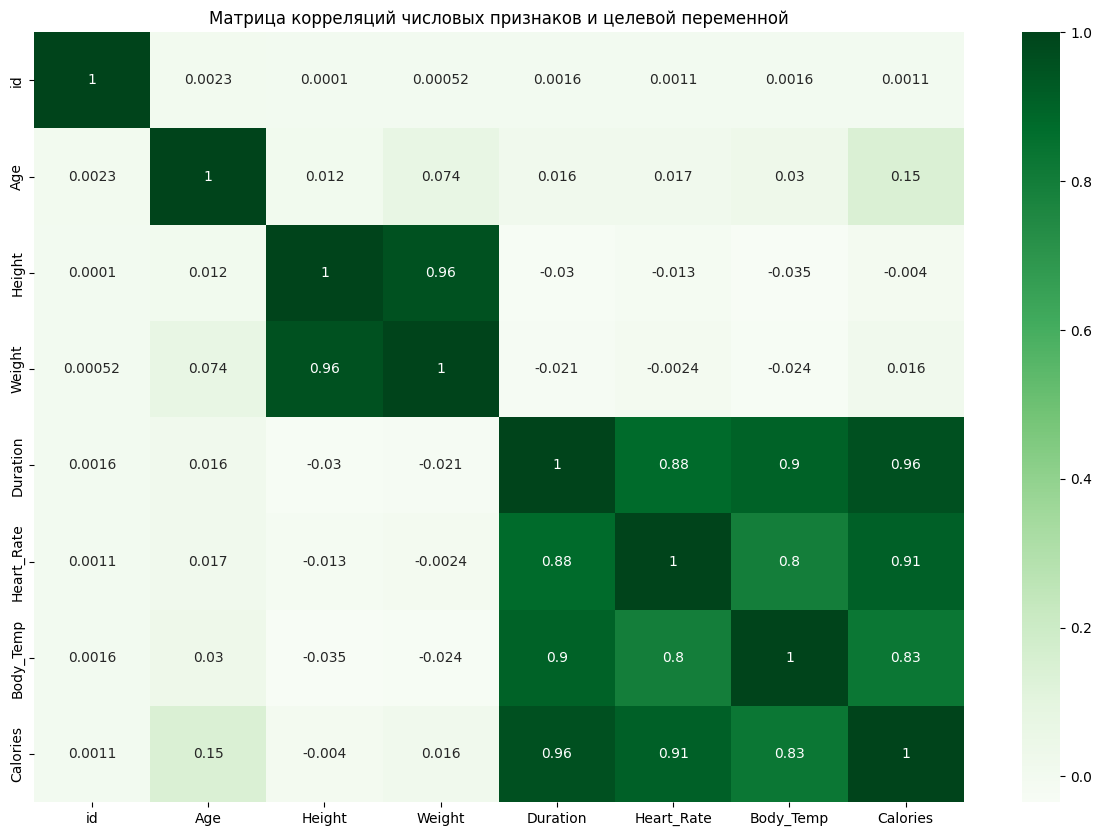

In [38]:
# Посторим тепловую карту линейной корреляции числовых признаков и целевой переменной
plt.figure(figsize=(15, 10))
sns.heatmap(df.drop(['Sex'], axis=1).corr(), annot=True, cmap="Greens")
plt.title('Матрица корреляций числовых признаков и целевой переменной')
plt.show()

Как видно из графика, id практически не оказывает никакого влияния на целевую переменную, поэтому исключим этот признак

In [39]:
# Разделим признаки и целевую переменную
X = df.drop(['id', 'Calories'], axis=1)
y = df[target]

In [40]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 7 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Sex         750000 non-null  object 
 1   Age         750000 non-null  int64  
 2   Height      750000 non-null  float64
 3   Weight      750000 non-null  float64
 4   Duration    750000 non-null  float64
 5   Heart_Rate  750000 non-null  float64
 6   Body_Temp   750000 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 40.1+ MB


In [41]:
# Определяем категориальные и числовые признаки
categorical_features = X.select_dtypes(include='object').columns
numerical_features = X.select_dtypes(include=np.number).columns
print('Категориальные признаки:', list(categorical_features))
print('Числовые признаки:', list(numerical_features))

Категориальные признаки: ['Sex']
Числовые признаки: ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp']


In [42]:
X[numerical_features].describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,41.420404,174.697685,75.145668,15.421015,95.483995,40.036253
std,15.175049,12.824496,13.982704,8.354095,9.449845,0.779875
min,20.000000,126.000000,36.000000,1.000000,67.000000,37.100000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000
50%,40.000000,174.000000,74.000000,15.000000,95.000000,40.300000
75%,52.000000,185.000000,87.000000,23.000000,103.000000,40.700000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000


In [43]:
# Анализ и обработка пропусков

df.isna().sum()

id            0
Sex           0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

Как видим, пропуски в нашем датасете отсутствуют

In [44]:
# Мода, количество уникальных значений для категориальных признаков

df_mode = X[categorical_features].mode()
df_unique = X[categorical_features].nunique()
print("Мода:")
print(df_mode)
print("-" * 50)
print('Количество уникальных значений')
print(df_unique)

Мода:
      Sex
0  female
--------------------------------------------------
Количество уникальных значений
Sex    2
dtype: int64


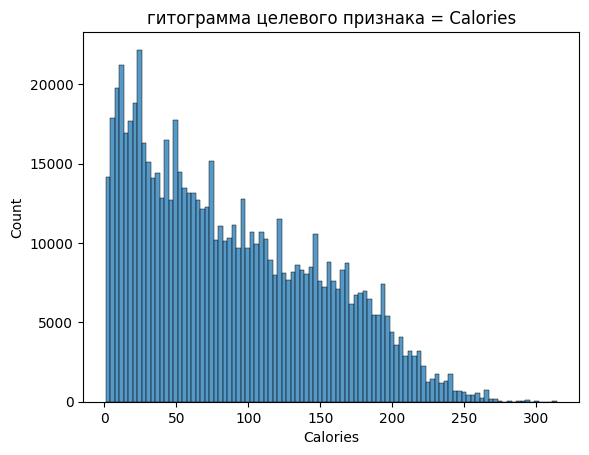

In [45]:
# Анализ целевого признака

sns.histplot(y, bins=100)
plt.title(f'гитограмма целевого признака = {target}')
plt.show()

Как видим, выбросы в целевой переменной отсутствуют

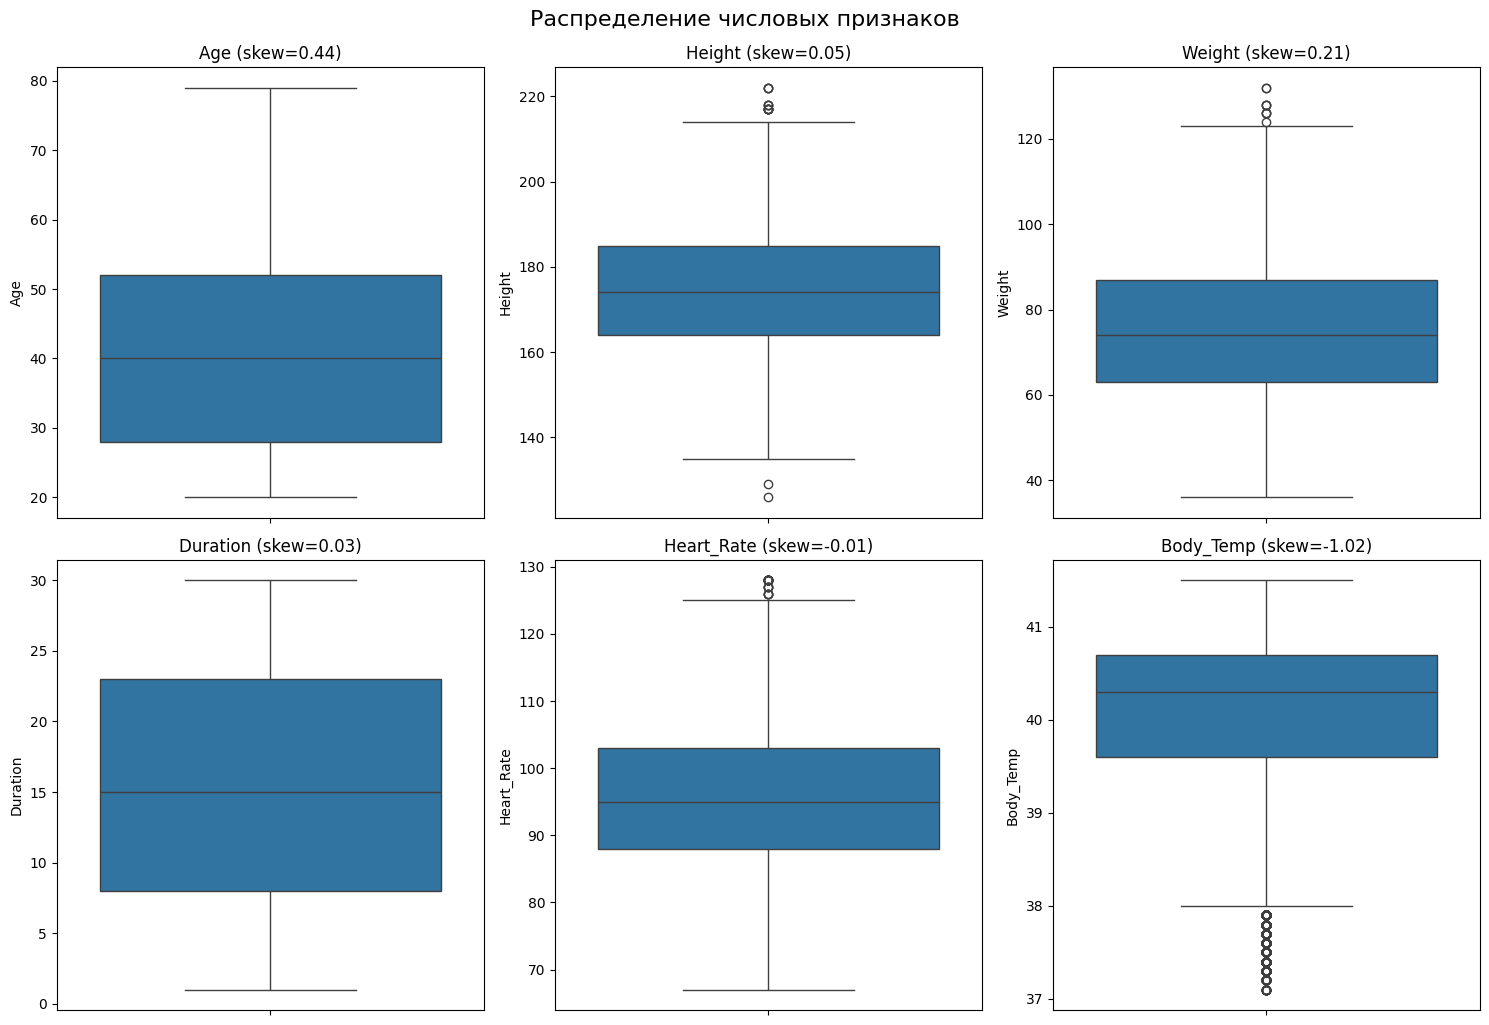

In [46]:
# Посмотрим на распределения числовых признаков
plt.figure(figsize=(15, 10))
n_cols = len(numerical_features) // 3
n_rows = 3 if len(numerical_features) % 3 == 0 else 4
for i, col in enumerate(numerical_features):
    plt.subplot(n_cols, n_rows, i + 1)
    sns.boxplot(df[col])
    plt.title(f'{col} (skew={df[col].skew():.2f})')
plt.tight_layout()
plt.suptitle("Распределение числовых признаков", fontsize=16, y=1.02)
plt.show()

На графиках мы видим, что выбросы есть в признаках Height (рост), Weight (вес), Heart_rate (пульс) и Body_temp (температура тела), но они не сильно критичны и укладываются в нормы организма человека. Но все же попробуем удалить выбросы, используя метод IQR 

In [47]:
# Удаление выбросов по IQR
Q1 = X[numerical_features].quantile(0.25)
Q3 = X[numerical_features].quantile(0.75)
IQR = Q3 - Q1
lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
mask_iqr = (X[numerical_features] >= Q1 - 1.5 * IQR) & (X[numerical_features] <= Q3 + 1.5 * IQR)
train_iqr = X[mask_iqr].copy()
print(f"\nУдалено выбросов по IQR: {len(X) - len(train_iqr)}")


Удалено выбросов по IQR: 0


Как видим, выбросы настолько незначительные, что их не удалось удалить используя метод IQR

# <font color='#11a642' size='6'> **Разделите данные на трейн и тест**

In [48]:
# Разделим данные на трейн и тест

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

<font color='#11a642' size='5'> Ответьте на вопрос:

Для чего нужен параметр random_state? попробуйте его изменить, что-то изменилось?

Суть параметра random_state  заключается в воспроизводимых случайных параметрах. Т.е., если явно задать значение random_state отличным от None, то генерируемые псевдослучайные величины будут иметь одни и те же ззначения при каждом вызове

# <font color='#11a642' size='6'> **Подготовка данных к обучению**


1. Обработка пропусков, если они есть
2. Обработка категориальных переменных, если они есть
3. Стоит ли делать нормализацию данных?



In [49]:
# Анализ и обработка категориальных переменных
# Т.к. количество уникальных признаков для категориальных значений не большое, то будем использовать 
# OneHot-кодирование категориальных признаков
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = ohe.fit_transform(X_train[categorical_features])
X_test_encoded = ohe.transform(X_test[categorical_features])
ohe_feature_names = ohe.get_feature_names_out(categorical_features)
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=ohe_feature_names, index=X_train.index)
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=ohe_feature_names, index=X_test.index)

# Удаляем старые категориальные, добавляем закодированные
X_train = X_train.drop(columns=['Sex']).join(X_train_encoded_df)
X_test = X_test.drop(columns=['Sex']).join(X_test_encoded_df)

In [50]:
# Масштабирование числовых признаков

scaler = StandardScaler()
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

# <font color='#11a642' size='6'> **Построение модели дерево решений**

## <font color='#11a642' size='5'> Построение максимального дерева без ограничений на гиперпараметры


In [51]:
# Построение максимального дерева без ограничений на гиперпараметры

model_dtc = DecisionTreeRegressor()
model_dtc.fit(X_train, y_train)

DecisionTreeRegressor()

### <font color='#11a642' size='4'> Оценка качества  максимального дерева без ограничений на гиперпараметры


In [52]:
# Предсказания на тестовом и тренировочном наборе
y_pred_test = model_dtc.predict(X_test)
y_pred_train = model_dtc.predict(X_train)

In [53]:
# Вычисление метрик
mse_train = mean_squared_error(y_train, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)
mae_train = mean_absolute_error(y_train, y_pred_train)
mae_test = mean_absolute_error(y_test, y_pred_test)
mape_train = mean_absolute_percentage_error(y_train, y_pred_train)
mape_test = mean_absolute_percentage_error(y_test, y_pred_test)

# Вывод результатов
print(f'Mean Squared Error на трейне: {mse_train:.3f}')
print(f'Mean Squared Error на тесте: {mse_test:.3f}')
print(f'Mean Absolute Error на трейне: {mae_train:.3f}')
print(f'Mean Absolute Error на тесте: {mae_test:.3f}')
print(f'Mean Absolute Percantage Error на трейне: {mape_train:.3f}')
print(f'Mean Absolute Percantage Error на тесте: {mape_test:.3f}')

Mean Squared Error на трейне: 0.035
Mean Squared Error на тесте: 27.443
Mean Absolute Error на трейне: 0.014
Mean Absolute Error на тесте: 3.124
Mean Absolute Percantage Error на трейне: 0.000
Mean Absolute Percantage Error на тесте: 0.053


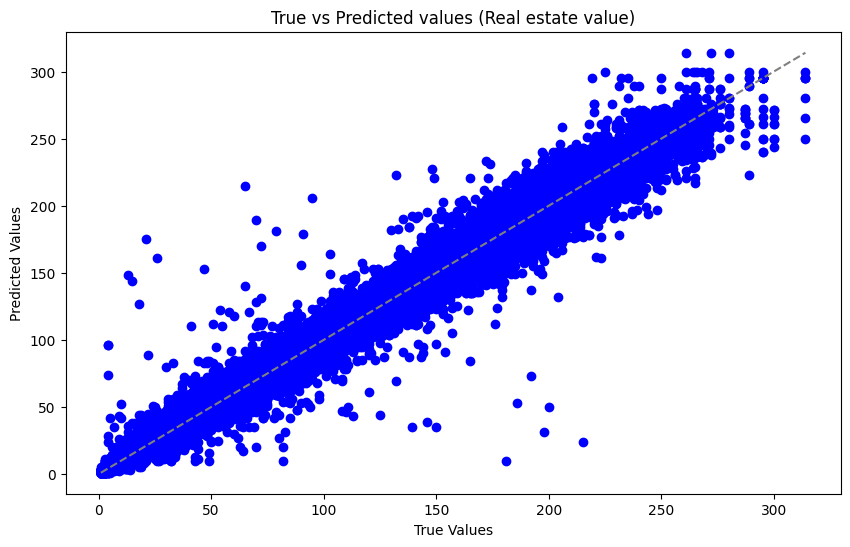

In [54]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

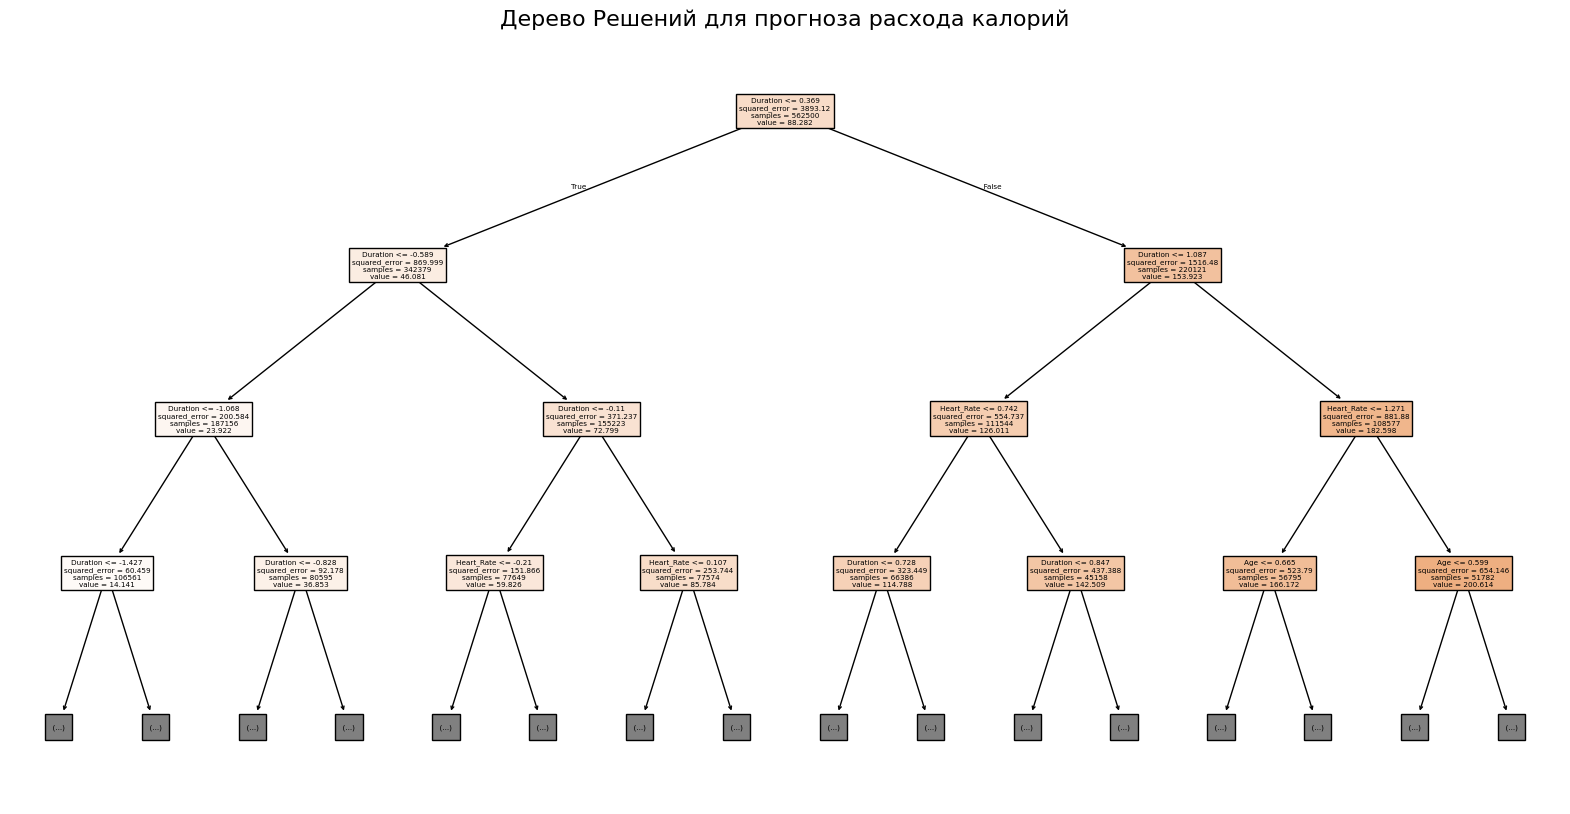

In [55]:
# Построение дерева

plt.figure(figsize=(20, 10))
plot_tree(model_dtc, max_depth=3, feature_names=X_train.columns, filled=True)
plt.title('Дерево Решений для прогноза расхода калорий', fontsize=16)
plt.show()

## <font color='#11a642' size='5'> Построение дерева с поиском наилучших гиперапарметров


Для поиска наилучших гиперпараметров используйте:
- `GridSearchCV` или `RandomizedSearchCV`
- Пример параметров:

```python
param_grid = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
```

In [65]:
# Построение дерева с поиском наилучших параметров

# Создание и обучение модели дерева решений с поиском по сетке
param_grid = {
    'max_depth': [ 3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}

dt_best_regressor = DecisionTreeRegressor(random_state=42)
grid_search = GridSearchCV(dt_best_regressor, param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 3, 5],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_absolute_error')

In [66]:
# Выведем наилучшие параметры
best_params = grid_search.best_params_
best_params

{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2}

In [67]:
# Построение модели
best_dt_classifier = grid_search.best_estimator_
best_dt_classifier

DecisionTreeRegressor(max_depth=5, random_state=42)

### <font color='#11a642' size='4'> Оценка качества  дерева с оптимальными гиперпараметрами


In [68]:
# Предсказания на тестовом и тренировочном наборе
y_pred_dt_test = grid_search.predict(X_test)
y_pred_gr_train = grid_search.predict(X_train)

In [69]:
# Вычисление метрик

mse_dt_train = mean_squared_error(y_train, y_pred_gr_train)
mse_dt_test = mean_squared_error(y_test, y_pred_dt_test)
mae_dt_train = mean_absolute_error(y_train, y_pred_gr_train)
mae_dt_test = mean_absolute_error(y_test, y_pred_dt_test)
mape_dt_train = mean_absolute_percentage_error(y_train, y_pred_gr_train)
mape_dt_test = mean_absolute_percentage_error(y_test, y_pred_dt_test)

# Вывод результатов

print(f'Mean Squared Error на трейне: {mse_dt_train:.3f}')
print(f'Mean Squared Error на тесте: {mse_dt_test:.3f}')
print(f'Mean Absolute Error на трейне: {mae_dt_train:.3f}')
print(f'Mean Absolute Error на тесте: {mae_dt_test:.3f}')
print(f'Mean Absolute Percantage Error на трейне: {mape_dt_train:.3f}')
print(f'Mean Absolute Percantage Error на тесте: {mape_dt_test:.3f}')

Mean Squared Error на трейне: 131.472
Mean Squared Error на тесте: 133.854
Mean Absolute Error на трейне: 8.064
Mean Absolute Error на тесте: 8.123
Mean Absolute Percantage Error на трейне: 0.142
Mean Absolute Percantage Error на тесте: 0.143


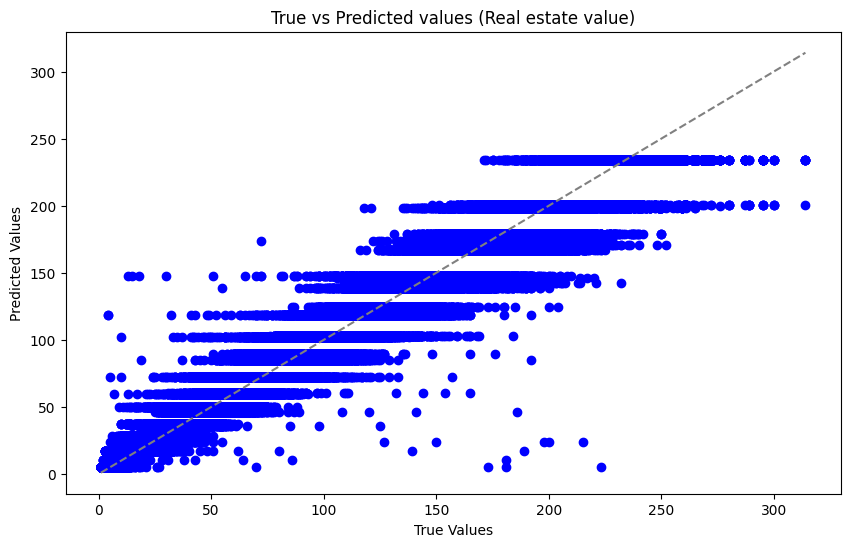

In [70]:
# График
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_dt_test, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='gray')
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted values (Real estate value)')
plt.show()

### <font color='#11a642' size='4'> Важность признаков для дерева с оптимальными гиперпараметрами



Важность признаков (по дереву решений):
      Признак  Важность
3    Duration  0.950487
4  Heart_Rate  0.031923
0         Age  0.014184
6    Sex_male  0.003406
1      Height  0.000000
2      Weight  0.000000
5   Body_Temp  0.000000


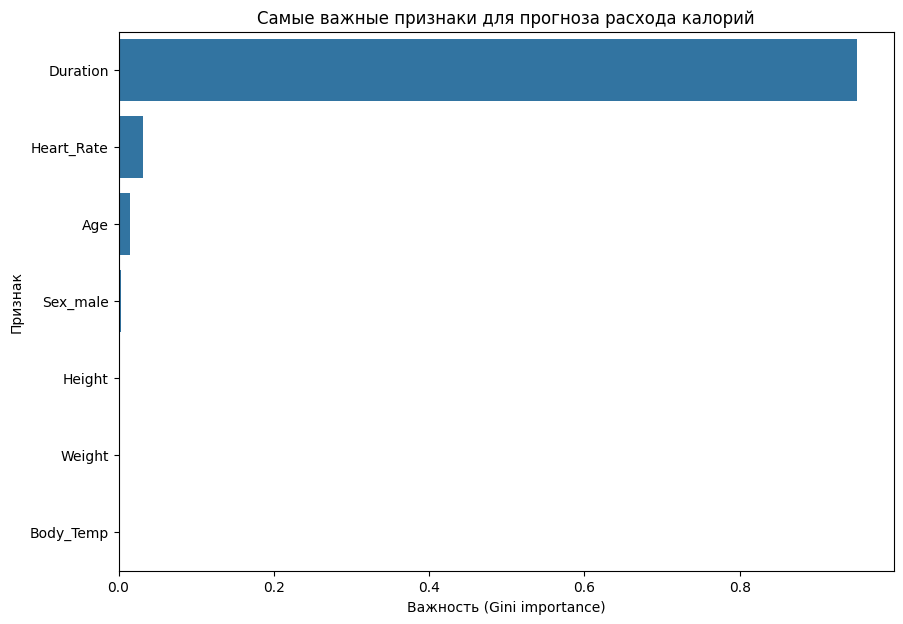

In [71]:
# Важность признаков
feature_importances = pd.DataFrame({'Признак': X_train.columns,
                                    'Важность': best_dt_classifier.feature_importances_})
feature_importances = feature_importances.sort_values(by='Важность', ascending=False)
print("\nВажность признаков (по дереву решений):")
print(feature_importances.head(10))

plt.figure(figsize=(10, 7))
sns.barplot(x='Важность', y='Признак', data=feature_importances.head(10))
plt.title('Самые важные признаки для прогноза расхода калорий')
plt.xlabel('Важность (Gini importance)')
plt.ylabel('Признак')
plt.show()

Как видим, наиболее важными признаками являются Duration, Heart_Rate, Age

### <font color='#11a642' size='4'> Нарисуйте дерево с оптимальными гиперпараметрами


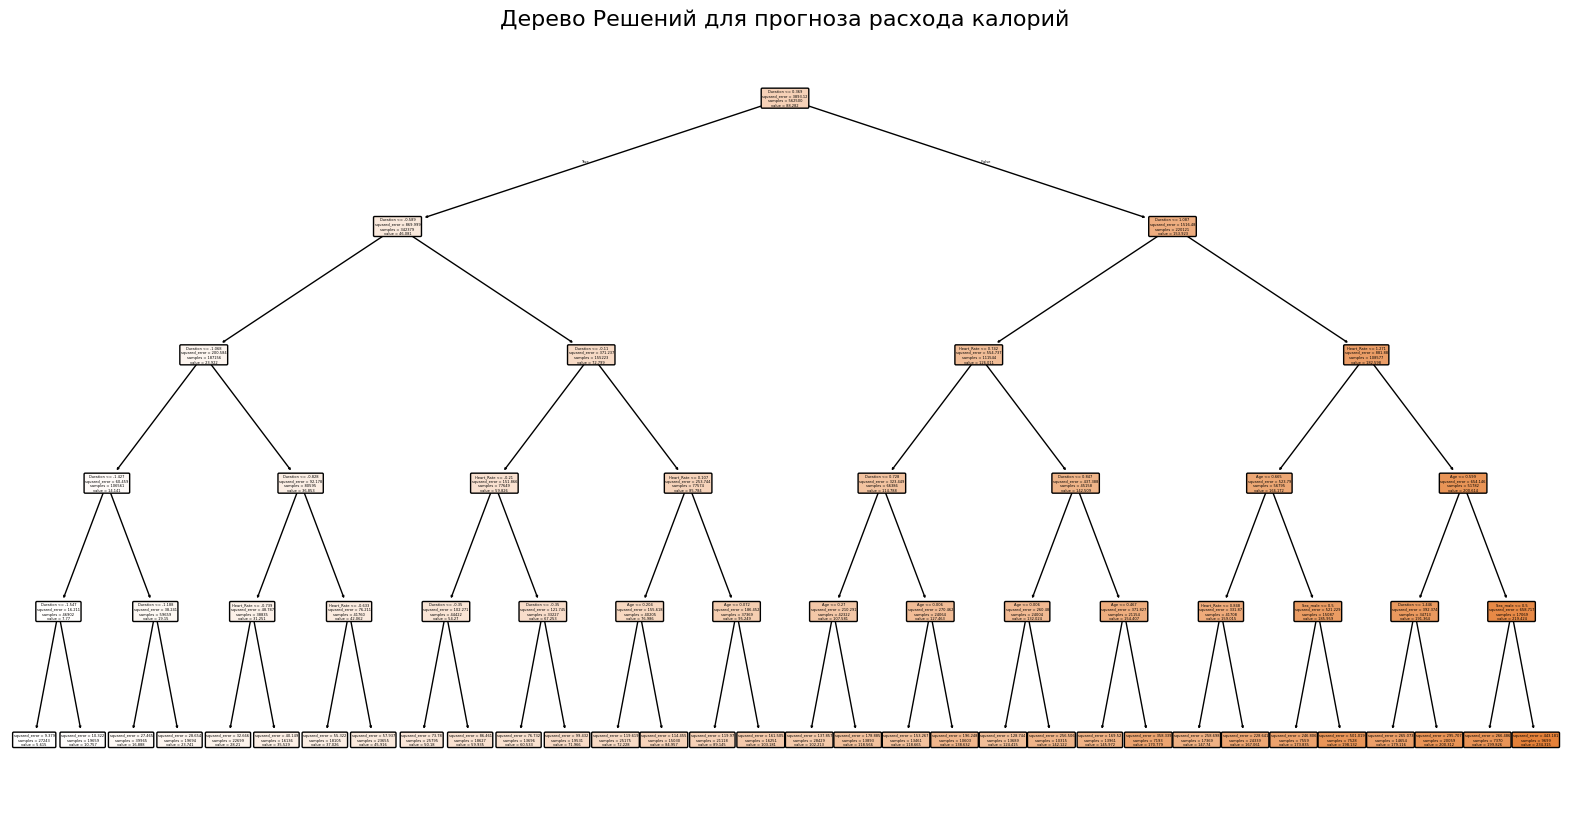

In [72]:
plt.figure(figsize=(20, 10))
plot_tree(best_dt_classifier, feature_names=X_train.columns, rounded=True, filled=True)
plt.title('Дерево Решений для прогноза расхода калорий', fontsize=16)
plt.show()

### <font color='#11a642' size='4'> Ваши выводы


Как видно из расчета метрик, наилучшей моделью является модель дерева с поиском наилучших гиперпараметров